In [1]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,models

2024-05-09 10:53:37.476911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 10:53:38.187348: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_hdf('BD_Emotions_Gray.h5')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4623 entries, 0 to 4622
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Imagen           4623 non-null   object
 1   Caracteristicas  4623 non-null   object
 2   Rostro           4623 non-null   object
 3   Etiqueta         4623 non-null   object
dtypes: object(4)
memory usage: 180.6+ KB


In [4]:
df.head()

,Imagen,Caracteristicas,Rostro,Etiqueta
0,"[[154, 157, 156, 157, 158, 159, 157, 157, 159,...","[[[59, 64], [59, 72], [61, 80], [62, 88], [64,...","[[167, 166, 166, 18, 14, 35, 102, 18, 24, 39, ...",excited
1,"[[156, 155, 156, 156, 159, 156, 156, 157, 158,...","[[[57, 63], [58, 71], [59, 79], [60, 87], [62,...","[[167, 151, 9, 12, 107, 112, 19, 30, 40, 42, 8...",excited
2,"[[172, 171, 173, 171, 172, 172, 173, 172, 172,...","[[[60, 81], [60, 90], [61, 98], [62, 106], [64...","[[51, 5, 8, 81, 100, 105, 104, 107, 111, 123, ...",excited
3,"[[171, 168, 168, 170, 171, 169, 169, 170, 170,...","[[[62, 86], [62, 92], [64, 97], [65, 102], [67...","[[16, 15, 12, 17, 23, 36, 84, 121, 132, 141, 1...",excited
4,"[[180, 181, 181, 181, 183, 182, 181, 182, 182,...","[[[58, 75], [59, 82], [60, 89], [62, 96], [64,...","[[4, 5, 9, 25, 85, 107, 119, 126, 130, 134, 13...",excited


In [5]:
print(df['Rostro'][0])

[[167 166 166 ... 135  15  13]
 [167 167 162 ... 155  23  12]
 [165 167 137 ...  55  30  15]
 ...
 [173 185 190 ... 149 151 152]
 [177 195 199 ... 159 151 153]
 [180 196 191 ... 188 180 155]]


In [6]:
import numpy as np
from PIL import Image

# Función para redimensionar una imagen
def redimensionar_imagen(imagen, nuevo_ancho, nuevo_alto):
    img = Image.fromarray(imagen)
    img = img.resize((nuevo_ancho, nuevo_alto))
    return np.array(img)

# Definir el tamaño al que quieres redimensionar todas las imágenes
nuevo_ancho = 150
nuevo_alto = 150

# Redimensionar todas las imágenes a la misma forma y convertirlas en arreglos numpy
X = np.array([redimensionar_imagen(imagen, nuevo_ancho, nuevo_alto) for imagen in df['Rostro']])


In [7]:
X = X /255.0

In [9]:
etiquetas = df['Etiqueta'].astype('category').cat.codes

In [10]:
print(etiquetas)

0       2
1       2
2       2
3       2
4       2
       ..
4618    0
4619    0
4620    0
4621    0
4622    0
Length: 4623, dtype: int8


In [12]:
# Crear un diccionario que mapee los códigos a las etiquetas originales
diccionario_etiquetas = dict(enumerate(df['Etiqueta'].astype('category').cat.categories))

# Recuperar las etiquetas originales a partir de los códigos
etiquetas_originales = etiquetas.map(diccionario_etiquetas)

# Ahora puedes ver las etiquetas originales
print(etiquetas_originales)

0       excited
1       excited
2       excited
3       excited
4       excited
         ...   
4618      bored
4619      bored
4620      bored
4621      bored
4622      bored
Length: 4623, dtype: object


In [13]:
#Dividir datos de entrenamiento y validacion

X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.3, random_state=42)


In [14]:
# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(nuevo_ancho, nuevo_alto, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(len(etiquetas), activation='softmax')
])

/home/waldos/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-09 10:55:23.076617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-09 10:55:23.112038: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 85:
            print("\nReached 85% accuracy so cancelling training!")
            self.model.stop_training = True
            
back = myCallback() 

In [16]:
#compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test),callbacks=[back])

Epoch 1/25


I0000 00:00:1715277329.537290  196074 service.cc:145] XLA service 0x7f0b9c004950 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715277329.537344  196074 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti with Max-Q Design, Compute Capability 7.5
2024-05-09 10:55:29.564378: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 10:55:29.693371: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-05-09 10:55:30.397118: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.05GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 10:55:31.608166: W external/local_tsl/tsl/framework/bfc

  2/102 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.0938 - loss: 8.4238 

I0000 00:00:1715277337.007219  196074 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3482 - loss: 2.6561

2024-05-09 10:55:46.142192: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 10:55:46.555389: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 10:55:46.555425: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-05-09 10:55:47.019949: W external/local_tsl/tsl/framework/bfc_

102/102 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - accuracy: 0.3502 - loss: 2.6323 - val_accuracy: 0.4283 - val_loss: 1.1043
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.5354 - loss: 0.8900 - val_accuracy: 0.6727 - val_loss: 0.6710
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7128 - loss: 0.6230 - val_accuracy: 0.6943 - val_loss: 0.6155
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7336 - loss: 0.5604 - val_accuracy: 0.6965 - val_loss: 0.6118
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7329 - loss: 0.5561 - val_accuracy: 0.6770 - val_loss: 0.6508
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.7176 - loss: 0.5991 - val_accuracy: 0.6914 - val_loss: 0.6020
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7488 - loss: 0.5203 - val_accuracy: 0.6986 - val_loss: 0.5883
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.7784 - loss: 0.4810 - val_accura

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Precisión del modelo en el conjunto de prueba:", test_accuracy)

# Generar la matriz de confusión
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

print("Matriz de confusión:")
print(confusion_mat)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7202 - loss: 1.3058
Precisión del modelo en el conjunto de prueba: 0.717375636100769
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Matriz de confusión:
[[272  15  14]
 [ 10 395 157]
 [ 14 180 330]]


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


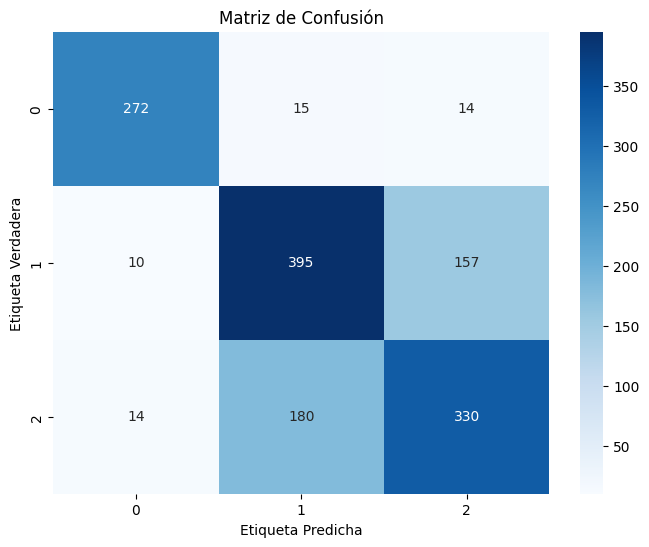

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Plotear la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()


In [21]:
import numpy as np
from PIL import Image

# Cargar y preprocesar la imagen
def cargar_y_preprocesar_imagen(ruta_imagen, nuevo_ancho, nuevo_alto):
    imagen = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises si es necesario
    imagen = imagen.resize((nuevo_ancho, nuevo_alto))
    imagen_array = np.array(imagen)
    imagen_array = np.expand_dims(imagen_array, axis=0)  # Agregar una dimensión de lote
    imagen_array = np.expand_dims(imagen_array, axis=3)  # Agregar una dimensión de canal (para escala de grises)
    return imagen_array

# Definir la ruta de la imagen a predecir
ruta_imagen = '62.jpg'

# Cargar y preprocesar la imagen
imagen_array = cargar_y_preprocesar_imagen(ruta_imagen, 150, 150)

# Realizar la predicción
prediccion = model.predict(imagen_array)

# Obtener la clase predicha
clase_predicha = np.argmax(prediccion)

# Imprimir la clase predicha
clases = ['Bored','Engaged' ,'Excited']
print("Clase predicha:", clases[clase_predicha])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Clase predicha: Bored


In [23]:
model.save('modeloCNN4.h5')